<a href="https://colab.research.google.com/github/0Kyumy0/Machine_Learning_CodingDojo/blob/main/metricsClassificationPartTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [68]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/bank_modified.csv'
df = pd.read_csv(filename)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [70]:
df.duplicated().sum()

0

**The goal is to predict whether the client will subscribe (yes: 1 or no: 0) to a term deposit (the target column is called "y_yes" in this CSV).**

In [71]:
df['y_yes'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

In [72]:
y = df['y_yes']
X = df.drop(columns = 'y_yes')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3,
                                                     random_state=24, 
                                                     stratify = y)

In [74]:
y_test.value_counts(normalize=True)

0    0.885041
1    0.114959
Name: y_yes, dtype: float64

# Regresión lineal manual

In [64]:
#scale = StandardScaler()
#scale.fit(X_train)
#X_train = scale.transform(X_train)
#X_test = scale.transform(X_test)

In [65]:
#log_reg_best = LogisticRegression(solver = 'liblinear', C=0.01, class_weight= None, penalty ='l2')
#log_reg_best.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Logistic Regresion pipeline

In [75]:
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
          'class_weight': [None, 'balanced']}

In [76]:
scale = StandardScaler()
log_reg = LogisticRegression(solver = 'liblinear')

In [77]:
gs = GridSearchCV(log_reg, params, cv=10)

In [78]:
log_pipe = make_pipeline(scale, gs)
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(solver='liblinear'),
                              param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                10],
                                          'class_weight': [None, 'balanced'],
                                          'penalty': ['l1', 'l2']}))])

In [79]:
gs.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [80]:
print(log_pipe.score(X_train, y_train))
print(log_pipe.score(X_test, y_test))

0.8906447534766119
0.8916728076639646


In [81]:
log_preds = log_pipe.predict(X_test)

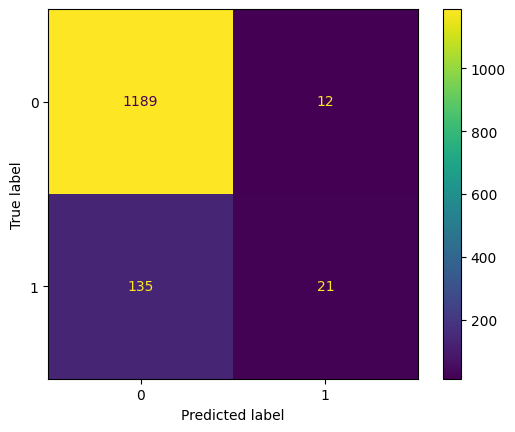

In [85]:
cm = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [114]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1201
           1       0.64      0.13      0.22       156

    accuracy                           0.89      1357
   macro avg       0.77      0.56      0.58      1357
weighted avg       0.87      0.89      0.86      1357



In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, log_preds).ravel()

In [94]:
recall = recall_score(y_test, log_preds)
print('Sensitivity/Recall of', recall)

Sensitivity/Recall of 0.1346153846153846


In [95]:
specificity = tn / (tn + fp)
print('Specificity of', specificity)

Specificity of 0.9900083263946711


# AUC ROC

In [99]:
roc_auc_score(y_train, log_pipe.predict_proba(X_train)[:,1])

0.8628042304737014

In [100]:
roc_auc_score(y_test, log_pipe.predict_proba(X_test)[:,1])

0.8498740365934371

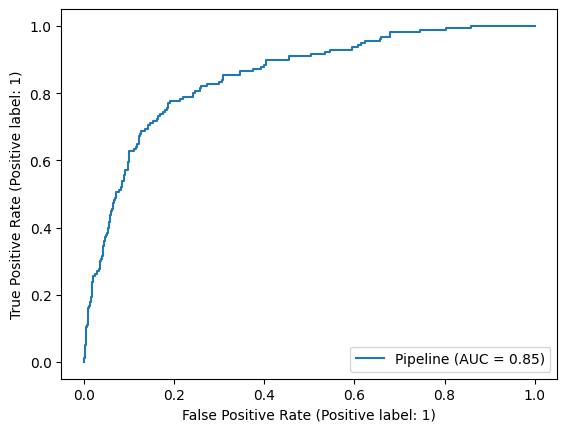

In [113]:
svc_disp = RocCurveDisplay.from_estimator(log_pipe, X_test, y_test)

# Questions
* **Which metric will be the best to evaluate the classification model for this dataset and why? Hint: think about what each metric means in this specific case. Which metric will help the bank the most?** 

The metric that would best serve the bank's objective is sensitivity, since with this data, a marketing strategy could be created that targets people who are most likely to purchase the service.
* Compare the model accuracy with the reference model. Do you see any issues?

The improvement between the reference model and the optimized one was only minimal.
* What other ways can be used to improve this model?

Increase the amount of data, since it is quite small and imbalanced. Also, we can try another type of classification model that could fit better the characteristics of the data.